# Linear Regression Model
### Load data and test train split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/content/drive/My Drive/4ML3/Project/train.csv')
dataset_val = dataset.values

x = dataset_val[:,0:(dataset_val.shape[1])-1]
y = dataset_val[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69420)

### Normalize Data

In [4]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train_stand = scaler_x.transform(X_train)
X_test_stand = scaler_x.transform(X_test)
y_train_stand = scaler_y.transform(y_train)
y_test_stand = scaler_y.transform(y_test)

# method to inverse-normalize the data back to critical temperatures in Kelvin
def inverse_normalize(value, y_or_x):
    new_val = np.array(value).reshape(-1,1)
    
    if y_or_x == "x":
        scaler = scaler_x
    else:
        scaler = scaler_y
    new_val = scaler.inverse_transform(new_val)
    
    return new_val

In [6]:
inverse_normalize(0.125, "y")

array([[38.75327462]])

### Apply Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_stand, y_train_stand)

# compute errors
y_train_pred = lin_reg.predict(X_train_stand)
y_test_pred = lin_reg.predict(X_test_stand)

from sklearn.metrics import mean_squared_error as MSE
training_error = np.array(MSE(y_train_stand,y_train_pred)).reshape(-1,1)
testing_error = np.array(MSE(y_test_stand,y_test_pred)).reshape(-1,1)
print("Training Error: {}".format(scaler_y.inverse_transform(training_error)))
print("Testing Error: {}".format(scaler_y.inverse_transform(testing_error)))

# Show the weights
print("LR Intercept: {}".format(lin_reg.intercept_))
#print("LR Model Weights: {}".format(lin_reg.coef_))
col_labels = columns=list(dataset.columns)[:-1]
df = pd.DataFrame(data=lin_reg.coef_, columns=col_labels)

Training Error: [[43.39874336]]
Testing Error: [[43.62880409]]
LR Intercept: [-1.47857841e-13]
time: 106 ms (started: 2021-12-07 19:09:57 +00:00)


In [ ]:
df # Linear regression coefficients for each feature

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,-0.112698,0.739433,-0.852727,-0.457711,0.654996,-0.387973,0.03124,0.3345,0.021192,-0.317538,0.040885,0.422258,-1.008366,-0.370683,0.928834,-1.476906,0.461826,0.655031,0.155118,-0.70293,-0.009304,-0.250073,2.798798,0.049219,-3.051188,0.925677,0.543201,0.32491,-0.090564,-0.184098,-0.283415,-0.404009,-0.061742,0.099986,0.359415,0.158349,-0.163694,-0.179728,-0.010257,0.261514,...,-0.129693,0.556396,0.206044,-0.606301,0.021876,-0.178381,-0.601911,-0.119497,0.791908,-0.360805,0.529067,-0.751941,-0.426537,0.574279,-0.192746,0.257857,-0.226834,0.189451,-0.11944,0.145218,-0.059941,0.68421,-0.07331,-0.374954,0.116419,0.011595,-0.419373,-0.283312,0.503461,-0.01029,-0.384191,0.722082,0.53669,-0.863814,0.943916,-0.814803,0.139676,-0.026485,0.116761,-0.317241


### Test Time Taken


In [ ]:
%load_ext autotime
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/content/drive/My Drive/4ML3/Project/train.csv')
dataset_val = dataset.values

x = dataset_val[:,0:(dataset_val.shape[1])-1]
y = dataset_val[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69420)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train_stand = scaler_x.transform(X_train)
X_test_stand = scaler_x.transform(X_test)
y_train_stand = scaler_y.transform(y_train)
y_test_stand = scaler_y.transform(y_test)

# method to un-normalize the data back to critical temperatures in Kelvin
def inverse_normalize(value, y_or_x):
    new_val = np.array(value).reshape(-1,1)
    
    if y_or_x == "x":
        scaler = scaler_x
    else:
        scaler = scaler_y
    new_val = scaler.inverse_transform(new_val)
    
    return new_val

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_stand, y_train_stand)

# compute errors
y_train_pred = lin_reg.predict(X_train_stand)
y_test_pred = lin_reg.predict(X_test_stand)

from sklearn.metrics import mean_squared_error as MSE
training_error = np.array(MSE(y_train_stand,y_train_pred)).reshape(-1,1)
testing_error = np.array(MSE(y_test_stand,y_test_pred)).reshape(-1,1)
print("Training Error: {}".format(scaler_y.inverse_transform(training_error)))
print("Testing Error: {}".format(scaler_y.inverse_transform(testing_error)))

# Show the weights
print("LR Intercept: {}".format(lin_reg.intercept_))
#print("LR Model Weights: {}".format(lin_reg.coef_))
col_labels = columns=list(dataset.columns)[:-1]
df = pd.DataFrame(data=lin_reg.coef_, columns=col_labels)

df

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Training Error: [[43.39874336]]
Testing Error: [[43.62880409]]
LR Intercept: [-1.47857841e-13]


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,...,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,-0.112698,0.739433,-0.852727,-0.457711,0.654996,-0.387973,0.03124,0.3345,0.021192,-0.317538,0.040885,0.422258,-1.008366,-0.370683,0.928834,-1.476906,0.461826,0.655031,0.155118,-0.70293,-0.009304,-0.250073,2.798798,0.049219,-3.051188,0.925677,0.543201,0.32491,-0.090564,-0.184098,-0.283415,-0.404009,-0.061742,0.099986,0.359415,0.158349,-0.163694,-0.179728,-0.010257,0.261514,...,-0.129693,0.556396,0.206044,-0.606301,0.021876,-0.178381,-0.601911,-0.119497,0.791908,-0.360805,0.529067,-0.751941,-0.426537,0.574279,-0.192746,0.257857,-0.226834,0.189451,-0.11944,0.145218,-0.059941,0.68421,-0.07331,-0.374954,0.116419,0.011595,-0.419373,-0.283312,0.503461,-0.01029,-0.384191,0.722082,0.53669,-0.863814,0.943916,-0.814803,0.139676,-0.026485,0.116761,-0.317241


time: 718 ms (started: 2021-12-07 19:11:11 +00:00)


## L2 Regularization varying Penalties

In [ ]:
from sklearn.linear_model import Ridge # uses L2 regularization by default with C = 1 (C = 1/alpha)
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

penalties = [0.005,0.1, 1, 5, 10, 20, 40, 60, 100, 200, 400, 800, 1600, 2000, 2500, 3000, 4000, 5000, 6000, 7000]
C_vals = []
for penalty in penalties:
  C_vals.append(1/(2*penalty))

training_errors = []
testing_errors = []

for i in range(len(penalties)):

  # define model
  print("Current Penalty: {}".format(penalties[i]))
  print("Current C_vals: {}".format(C_vals[i]))

  model = Ridge(alpha=penalties[i])
  model.fit(X_train_stand,y_train_stand)

  # compute errors
  y_train_pred = model.predict(X_train_stand)
  y_test_pred = model.predict(X_test_stand)

  # Compute traditional MSE error
  training_error = inverse_normalize(MSE(y_train_stand,y_train_pred), "y")
  testing_error = inverse_normalize(MSE(y_test_stand,y_test_pred), "y")
  print("Training Error: {}".format(training_error))
  print("Testing Error: {}\n".format(testing_error))

  #append scores and store
  training_errors.append(training_error)
  testing_errors.append(testing_error)

print("Training Error: {}".format(training_error))
print("Testing Error: {}".format(testing_error))



Current Penalty: 0.005
Current C_vals: 100.0
Training Error: [[43.39874476]]
Testing Error: [[43.62873436]]

Current Penalty: 0.1
Current C_vals: 5.0
Training Error: [[43.39920069]]
Testing Error: [[43.62802383]]

Current Penalty: 1
Current C_vals: 0.5
Training Error: [[43.41270283]]
Testing Error: [[43.63674645]]

Current Penalty: 5
Current C_vals: 0.1
Training Error: [[43.45354381]]
Testing Error: [[43.66766257]]

Current Penalty: 10
Current C_vals: 0.05
Training Error: [[43.48888924]]
Testing Error: [[43.69332737]]

Current Penalty: 20
Current C_vals: 0.025
Training Error: [[43.55201153]]
Testing Error: [[43.74363448]]

Current Penalty: 40
Current C_vals: 0.0125
Training Error: [[43.66168707]]
Testing Error: [[43.84142151]]

Current Penalty: 60
Current C_vals: 0.008333333333333333
Training Error: [[43.75232721]]
Testing Error: [[43.9277828]]

Current Penalty: 100
Current C_vals: 0.005
Training Error: [[43.89359717]]
Testing Error: [[44.06751075]]

Current Penalty: 200
Current C_vals

In [ ]:
print("The optimal C value: {}\nTesting Error: {}".format(C_vals[list(testing_errors).index(min(testing_errors))], testing_errors[list(testing_errors).index(min(testing_errors))]))

The optimal C value: 5.0
Testing Error: [43.62802383]
time: 3.81 ms (started: 2021-12-07 19:46:28 +00:00)


### Plots

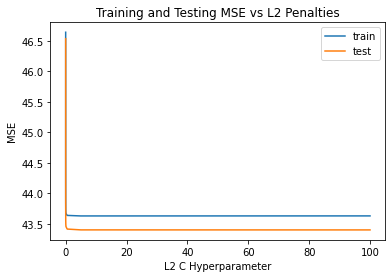

time: 204 ms (started: 2021-12-07 19:44:27 +00:00)


In [ ]:
testing_errors = (np.array(testing_errors)).reshape(-1,1)
training_errors = (np.array(training_errors)).reshape(-1,1)
plt.plot(C_vals, testing_errors)
plt.plot(C_vals, training_errors)
plt.title("Training and Testing MSE vs L2 Penalties")
plt.xlabel("L2 C Hyperparameter")
plt.ylabel("MSE")
plt.legend(["train", "test"])
plt.show()

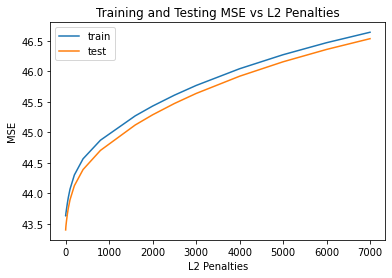

time: 218 ms (started: 2021-12-07 19:44:36 +00:00)


In [ ]:
testing_errors = (np.array(testing_errors)).reshape(-1,1)
training_errors = (np.array(training_errors)).reshape(-1,1)
plt.plot(penalties, testing_errors)
plt.plot(penalties, training_errors)
plt.title("Training and Testing MSE vs L2 Penalties")
plt.xlabel("L2 Penalties")
plt.ylabel("MSE")
plt.legend(["train", "test"])
plt.show()

In [ ]:
C_vals

[5000.0,
 500.0,
 50.0,
 5.0,
 0.5,
 0.1,
 0.05,
 0.025,
 0.0125,
 0.008333333333333333,
 0.005,
 0.0025,
 0.00125,
 0.000625,
 0.0003125,
 0.00025,
 0.0002,
 0.00016666666666666666,
 0.000125,
 0.0001,
 8.333333333333333e-05,
 7.142857142857143e-05]

time: 3.46 ms (started: 2021-12-07 19:35:05 +00:00)


# Polynomial Regression

##Testing Amount of Data

####Power 2 - Pipeline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# method to un-normalize the data back to critical temperatures in Kelvin
def inverse_normalize(value, y_or_x):
    new_val = np.array(value).reshape(-1,1)
    
    if y_or_x == "x":
        scaler = scaler_x
    else:
        scaler = scaler_y
    new_val = scaler.inverse_transform(new_val)
    
    return new_val

from sklearn.metrics import mean_squared_error as MSE
sample_size = [10, 100, 500, 1000, 5000, 10000, 12000, 14000, 18000, 20000]

p2_training_error = []
p2_testing_error = []

for i in range(len(sample_size)):

  print("Sample Size: {}".format(sample_size[i]))
  import numpy as np
  import pandas as pd
  pd.get_option("display.max_columns")
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split

  dataset = pd.read_csv('/content/drive/My Drive/4ML3/Project/train.csv')
  dataset_val = dataset.values

  x = dataset_val[0:sample_size[i],0:(dataset_val.shape[1])-1]
  y = dataset_val[0:sample_size[i],-1]

  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69420)

  from sklearn.preprocessing import StandardScaler
  scaler_x = StandardScaler()
  scaler_y = StandardScaler()

  y_train = y_train.reshape(-1,1)
  y_test = y_test.reshape(-1,1)

  scaler_x.fit(X_train)
  scaler_y.fit(y_train)

  X_train_stand = scaler_x.transform(X_train)
  X_test_stand = scaler_x.transform(X_test)
  y_train_stand = scaler_y.transform(y_train)
  y_test_stand = scaler_y.transform(y_test)

  # Initialize polynomial features for regression
  qr = LinearRegression()
  quadratic = PolynomialFeatures(degree = 2)
  poly_reg_quad = make_pipeline(quadratic, qr)
  poly_reg_quad.fit(X_train_stand,y_train_stand)
  y_quad_eval_train = poly_reg_quad.predict(X_train_stand)
  y_quad_eval_test = poly_reg_quad.predict(X_test_stand)
  # Power 2 MSE
  training_error = MSE(y_train_stand,y_quad_eval_train)
  testing_error = MSE(y_test_stand,y_quad_eval_test)
  print("Training Error: {}".format(inverse_normalize(training_error, 'y')))
  print("Testing Error: {}".format(inverse_normalize(testing_error, 'y')))

  p2_training_error.append(inverse_normalize(training_error, 'y'))
  p2_testing_error.append(inverse_normalize(testing_error, 'y'))

Sample Size: 10
Training Error: [[26.14285714]]
Testing Error: [[38.99599297]]
Sample Size: 100
Training Error: [[57.79279963]]
Testing Error: [[6.82395997e+24]]
Sample Size: 10000
Training Error: [[59.93417609]]
Testing Error: [[1.69978986e+14]]
Sample Size: 20000
Training Error: [[38.62382991]]
Testing Error: [[55.50263848]]


####Power 4 - Pipeline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# method to un-normalize the data back to critical temperatures in Kelvin
def inverse_normalize(value, y_or_x):
    new_val = np.array(value).reshape(-1,1)
    
    if y_or_x == "x":
        scaler = scaler_x
    else:
        scaler = scaler_y
    new_val = scaler.inverse_transform(new_val)
    
    return new_val

from sklearn.metrics import mean_squared_error as MSE
sample_size = [10, 20, 40, 80, 100]

p4_training_error = []
p4_testing_error = []

for i in range(len(sample_size)):

  print("Sample Size: {}".format(sample_size[i]))
  import numpy as np
  import pandas as pd
  pd.get_option("display.max_columns")
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split

  dataset = pd.read_csv('/content/drive/My Drive/4ML3/Project/train.csv')
  dataset_val = dataset.values

  x = dataset_val[0:sample_size[i],0:(dataset_val.shape[1])-1]
  y = dataset_val[0:sample_size[i],-1]

  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69420)

  from sklearn.preprocessing import StandardScaler
  scaler_x = StandardScaler()
  scaler_y = StandardScaler()

  y_train = y_train.reshape(-1,1)
  y_test = y_test.reshape(-1,1)

  scaler_x.fit(X_train)
  scaler_y.fit(y_train)

  X_train_stand = scaler_x.transform(X_train)
  X_test_stand = scaler_x.transform(X_test)
  y_train_stand = scaler_y.transform(y_train)
  y_test_stand = scaler_y.transform(y_test)

  # Initialize polynomial features for regression
  # Power 4 Model Setup
  p4r = LinearRegression()
  power4 = PolynomialFeatures(degree = 4)
  poly_reg_four = make_pipeline(power4, p4r)
  poly_reg_four.fit(X_train_stand,y_train_stand)
  y_p4_eval_train = poly_reg_four.predict(X_train_stand)
  y_p4_eval_test = poly_reg_four.predict(X_test_stand)
  # Power 4 MSE
  training_error = MSE(y_train_stand,y_p4_eval_train)
  testing_error = MSE(y_test_stand,y_p4_eval_test)
  #print("Training Error: {}".format(inverse_normalize(training_error, 'y')))
  #print("Testing Error: {}".format(inverse_normalize(testing_error, 'y')))

  print("Training Error: {}".format(training_error))
  print("Testing Error: {}".format(testing_error))

  p4_training_error.append(inverse_normalize(training_error, 'y'))
  p4_testing_error.append(inverse_normalize(testing_error, 'y'))

Sample Size: 10
Training Error: 6.169379817160378e-26
Testing Error: 0.22339699059337514
Sample Size: 20
Training Error: 3.771649666389034e-27
Testing Error: 97263.5734968643
Sample Size: 40
Training Error: 0.07978162007331813
Testing Error: 5.644268731126022e+21
Sample Size: 80
Training Error: 0.3562381981187128
Testing Error: 3.906963416960303e+20
Sample Size: 100
Training Error: 0.39914739080882805
Testing Error: 1.0185012679309477e+22


### Determining Relation of Samples to Polynomial Transformed Features



#### Power 2 No Pipeline

In [ ]:
poly_level = 2

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as MSE
import math

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# method to un-normalize the data back to critical temperatures in Kelvin
def inverse_normalize(value, y_or_x):
    new_val = np.array(value).reshape(-1,1)
    
    if y_or_x == "x":
        scaler = scaler_x
    else:
        scaler = scaler_y
    new_val = scaler.inverse_transform(new_val)
    
    return new_val

import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/content/drive/My Drive/4ML3/Project/train.csv')
dataset_val = dataset.values

x = dataset_val[:,0:(dataset_val.shape[1])-1]
y = dataset_val[:,-1]


sample_sizes = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800, 16000, 20000, len(x)]
print("Sample Sizes to Iterate through: {}".format(sample_sizes))

training_errors = []
testing_errors = []
training_errors_log = []
testing_errors_log = []


for i in range(len(sample_sizes)):

  print("Polynomial Level = {}\nSample Size = {}".format(poly_level, sample_sizes[i]))

  x = dataset_val[0:sample_sizes[i],0:(dataset_val.shape[1])-1]
  y = dataset_val[0:sample_sizes[i],-1]

  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69420)

  from sklearn.preprocessing import StandardScaler
  scaler_x = StandardScaler()
  scaler_y = StandardScaler()

  y_train = y_train.reshape(-1,1)
  y_test = y_test.reshape(-1,1)

  scaler_x.fit(X_train)
  scaler_y.fit(y_train)

  X_train_stand = scaler_x.transform(X_train)
  X_test_stand = scaler_x.transform(X_test)
  y_train_stand = scaler_y.transform(y_train)
  y_test_stand = scaler_y.transform(y_test)
  quadratic_reg = LinearRegression()
  quadratic = PolynomialFeatures(degree = poly_level)
  x_quad = quadratic.fit_transform(X_train_stand)

  print("Size of transformed x: {}".format(x_quad.shape))

  quadratic_reg.fit(x_quad, y_train_stand)

  x_quad_train_stand = quadratic.fit_transform(X_train_stand)
  x_quad_test_stand = quadratic.fit_transform(X_test_stand)

  y_pred_quad_train = quadratic_reg.predict(x_quad_train_stand)
  y_pred_quad_test = quadratic_reg.predict(x_quad_test_stand)

  training_error = inverse_normalize(MSE(y_train_stand,y_pred_quad_train), "y")
  testing_error = inverse_normalize(MSE(y_test_stand,y_pred_quad_test), "y")

  training_errors.append(training_error)
  testing_errors.append(testing_error)

  training_errors_log.append(math.log(training_error, 10))
  testing_errors_log.append(math.log(testing_error, 10))


  print("Training Error: {}".format(training_error))
  print("Testing Error: {}\n".format(testing_error))

Sample Sizes to Iterate through: [25, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800, 16000, 20000, 21263]
Polynomial Level = 2
Sample Size = 25
Size of transformed x: (17, 3403)
Training Error: [[29.86301674]]
Testing Error: [[1.73002902e+19]]

Polynomial Level = 2
Sample Size = 50
Size of transformed x: (35, 3403)
Training Error: [[50.57553674]]
Testing Error: [[3.83583492e+17]]

Polynomial Level = 2
Sample Size = 100
Size of transformed x: (70, 3403)
Training Error: [[57.79279963]]
Testing Error: [[6.82395997e+24]]

Polynomial Level = 2
Sample Size = 200
Size of transformed x: (140, 3403)
Training Error: [[65.90891252]]
Testing Error: [[6.5301658e+24]]

Polynomial Level = 2
Sample Size = 400
Size of transformed x: (280, 3403)
Training Error: [[68.59315298]]
Testing Error: [[6.19286635e+20]]

Polynomial Level = 2
Sample Size = 800
Size of transformed x: (560, 3403)
Training Error: [[68.27780581]]
Testing Error: [[4.25230847e+25]]

Polynomial Level = 2
Sample Size = 1600
Size of tran

In [ ]:
training_errors = (np.array(training_errors)).reshape(-1,1)

In [ ]:
training_errors

array([[29.86301674],
       [50.57553674],
       [57.79279963],
       [65.90891252],
       [68.59315298],
       [68.27780581],
       [66.08917383],
       [62.07622951],
       [62.72923351],
       [50.82914695],
       [43.13153267],
       [38.62382991],
       [37.45607206]])

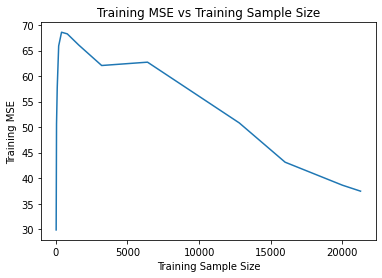

In [ ]:
training_errors = (np.array(training_errors)).reshape(-1,1)
testing_errors = (np.array(testing_errors)).reshape(-1,1)

plt.plot(sample_sizes, training_errors)
plt.title("Training MSE vs Training Sample Size")
plt.xlabel("Training Sample Size")
plt.ylabel("Training MSE")
# plt.legend(["train", "validation"])
plt.show()

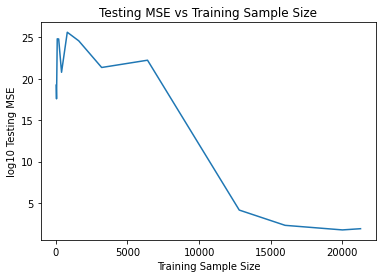

In [ ]:
plt.plot(sample_sizes, testing_errors_log)
plt.title("Testing MSE vs Training Sample Size")
plt.xlabel("Training Sample Size")
plt.ylabel("log10 Testing MSE")
# plt.legend(["train", "validation"])
plt.show()

### Power 4 No Pipeline

In [ ]:
poly_level = 4

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as MSE

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# method to un-normalize the data back to critical temperatures in Kelvin
def inverse_normalize(value, y_or_x):
    new_val = np.array(value).reshape(-1,1)
    
    if y_or_x == "x":
        scaler = scaler_x
    else:
        scaler = scaler_y
    new_val = scaler.inverse_transform(new_val)
    
    return new_val

import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/content/drive/My Drive/4ML3/Project/train.csv')
dataset_val = dataset.values

x = dataset_val[:,0:(dataset_val.shape[1])-1]
y = dataset_val[:,-1]

training_errors = []
testing_errors = []
training_errors_log = []
testing_errors_log = []


sample_sizes = [25, 50, 100, 200]
print("Sample Sizes to Iterate through: {}".format(sample_sizes))


for i in range(len(sample_sizes)):

  print("Polynomial Level = {}\nSample Size = {}".format(poly_level, sample_sizes[i]))

  x = dataset_val[0:sample_sizes[i],0:(dataset_val.shape[1])-1]
  y = dataset_val[0:sample_sizes[i],-1]

  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69420)

  from sklearn.preprocessing import StandardScaler
  scaler_x = StandardScaler()
  scaler_y = StandardScaler()

  y_train = y_train.reshape(-1,1)
  y_test = y_test.reshape(-1,1)

  scaler_x.fit(X_train)
  scaler_y.fit(y_train)

  X_train_stand = scaler_x.transform(X_train)
  X_test_stand = scaler_x.transform(X_test)
  y_train_stand = scaler_y.transform(y_train)
  y_test_stand = scaler_y.transform(y_test)
  quadratic_reg = LinearRegression()
  quadratic = PolynomialFeatures(degree = poly_level)
  x_quad = quadratic.fit_transform(X_train_stand)

  print("Size of transformed x: {}".format(x_quad.shape))

  quadratic_reg.fit(x_quad, y_train_stand)

  x_quad_train_stand = quadratic.fit_transform(X_train_stand)
  x_quad_test_stand = quadratic.fit_transform(X_test_stand)

  y_pred_quad_train = quadratic_reg.predict(x_quad_train_stand)
  y_pred_quad_test = quadratic_reg.predict(x_quad_test_stand)

  training_error = inverse_normalize(MSE(y_train_stand,y_pred_quad_train), "y")
  testing_error = inverse_normalize(MSE(y_test_stand,y_pred_quad_test), "y")

  training_errors.append(training_error)
  testing_errors.append(testing_error)

  training_errors_log.append(math.log(training_error, 10))
  testing_errors_log.append(math.log(testing_error, 10))

  print("Training Error: {}".format(training_error))
  print("Testing Error: {}\n".format(testing_error))

Sample Sizes to Iterate through: [25, 50, 100, 200]
Polynomial Level = 4
Sample Size = 25
Size of transformed x: (17, 2024785)
Training Error: [[29.99858461]]
Testing Error: [[3.09800604e+18]]

Polynomial Level = 4
Sample Size = 50
Size of transformed x: (35, 2024785)
Training Error: [[50.68526502]]
Testing Error: [[1.4951221e+18]]

Polynomial Level = 4
Sample Size = 100
Size of transformed x: (70, 2024785)
Training Error: [[69.31345433]]
Testing Error: [[3.17427517e+23]]

Polynomial Level = 4
Sample Size = 200
Size of transformed x: (140, 2024785)
Training Error: [[68.27431284]]
Testing Error: [[1.57988315e+25]]



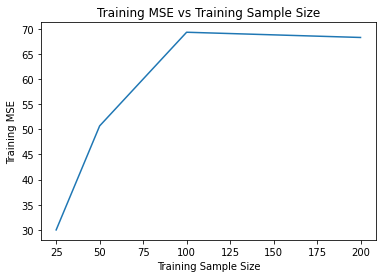

In [ ]:
training_errors = (np.array(training_errors)).reshape(-1,1)
testing_errors = (np.array(testing_errors)).reshape(-1,1)

plt.plot(sample_sizes, training_errors)
plt.title("Training MSE vs Training Sample Size")
plt.xlabel("Training Sample Size")
plt.ylabel("Training MSE")
# plt.legend(["train", "validation"])
plt.show()

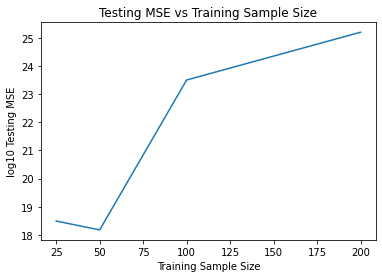

In [ ]:
plt.plot(sample_sizes, testing_errors_log)
plt.title("Testing MSE vs Training Sample Size")
plt.xlabel("Training Sample Size")
plt.ylabel("log10 Testing MSE")
# plt.legend(["train", "validation"])
plt.show()

# Applying PCA

##Initializing PCA Functions

In [ ]:
# PCA algorithm with Eigenvalue decomposition for Question 1 and Question 2
def EVDpca(x, A): # input parameter x should be a numpy array. DO NOT use dataframe for input x
    n,k = np.shape(x)
    D,P = np.linalg.eig(np.dot(x.T,x))
    index = np.argsort(-D) # indices in descending order
    p = np.zeros((k,A))
    t = np.zeros((n,A))
    R2_comp = np.zeros(A)
    R2 = np.zeros(A)
    for a in range(A):
        p[:,a] = P[:,index[a]] 
        t[:,a] = np.dot(x,p[:,a])
        R2_comp[a] = D[index[a]]/sum(D)
        R2[a] = np.sum(D[index[0:a+1]])/sum(D)
   
    return t,p,R2_comp,R2

# Function that can be used to plot the loadings for Question 2
def loading_plot(p,Dataset):
    s = np.arange(p.shape[0])
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(s + 0.00, P[:,0], color = 'b', width = 0.25)
    ax.bar(s + 0.25, P[:,1], color = 'g', width = 0.25)
    ax.set_xticks(s)
    ax.set_xticklabels( Dataset.columns[:p.shape[0]] )
    ax.legend(labels=['p1', 'p2'])

# function that can be used to plot the scores with CI for Question 2
def scores_plot_CI(t):
    import scipy.stats

    t1 = t[:,0]
    t2 = t[:,1]
    plt.figure(figsize=(16, 16))
    plt.axis([-2*np.amax(abs(t)), 2*np.amax(abs(t)),-1.5*np.amax(abs(t)),1.5*np.amax(abs(t))])
    plt.plot([-np.amax(abs(t)), np.amax(abs(t))], [0, 0],'k-',linewidth = 2)
    plt.plot([0, 0], [-np.amax(abs(t)), np.amax(abs(t))],'k-',LineWidth = 2)
    plt.xlabel('First component')
    plt.ylabel('Second component')
    plt.grid()

    # Plot the T2 elipses
    N = t.shape[0];
    a = np.square(np.std(t[:,0],ddof = 1));
    b = np.square(np.std(t[:,1],ddof = 1));
    # calculate T2 limits
    A = 2;
    Flim95 = scipy.stats.f.ppf(0.95,A,(N-A));
    Flim99 = scipy.stats.f.ppf(0.99,A,(N-A));
    T2lim95 = ((N-1)*(N+1)*A*Flim95)/(N*(N-A));
    T2lim99 = ((N-1)*(N+1)*A*Flim99)/(N*(N-A));

    # calculate elipse distances
    theta = np.linspace(0,2*np.pi,50);
    x95 = np.sqrt(a*T2lim95)*np.cos(theta);
    y95 = np.sqrt(b*T2lim95)*np.sin(theta);
    x99 = np.sqrt(a*T2lim99)*np.cos(theta);
    y99 = np.sqrt(b*T2lim99)*np.sin(theta);

    #  plot elipse
    plt.plot(x95, y95, '--r')
    plt.plot(x99, y99, '-r')

    if max(x99) > max(abs(t1)):
        plt.plot([-max(x99)*1.25, max(x99)*1.25], [0, 0],'k-',linewidth = 2)
        xlim = ([-max(x99)*1.25, max(x99)*1.25])
    else:
        plt.plot([-max(abs(t1))*1.25, max(abs(t1))*1.25], [0, 0],'k-',linewidth = 2)
        xlim = ([-max(abs(t1))*1.25, max(abs(t1))*1.25])    
    
    if max(y99) > max(abs(t2)):
        plt.plot([0, 0], [-max(y99)*1.25, max(y99)*1.25],'k-',linewidth = 2)
        ylim = ([-max(y99)*1.25, max(y99)*1.25])
    else:
        plt.plot([0, 0],[-max(abs(t2))*1.25, max(abs(t2))*1.25],'k-',linewidth = 2)
        ylim = ([-max(abs(t2))*1.25, max(abs(t2))*1.25]) 


    plt.plot(t[:,0],t[:,1],'ko', markersize = 20)

# Function that can be used to plot scores and loadings for Question 2
def scores_loading_plot(t,p,Dataset):
    plt.figure(figsize=(12, 12))
    plt.axis([-np.amax(abs(t)), np.amax(abs(t)),-np.amax(abs(t)),np.amax(abs(t))])
    plt.plot([-np.amax(abs(t)), np.amax(abs(t))], [0, 0],'k-',linewidth = 2)
    plt.plot([0, 0], [-np.amax(abs(t)), np.amax(abs(t))],'k-',LineWidth = 2)
    plt.xlabel('First component')
    plt.ylabel('Second component')
    plt.grid()


    for j in range(p.shape[0]):
        plt.quiver(0,0,1.5*p[j,0],1.5*p[j,1],scale=2,color = 'r')
        plt.text(10*p[j,0],7*p[j,1],Dataset.columns[j] ,fontsize = 16,color = 'r');
    plt.plot(t[:,0],t[:,1],'ko', markersize = 20)

# Function that plot the SPE with CI for Question 2
def SPEplot(res):
    from scipy.stats.distributions import chi2

    N = res.shape[0]
    SE = np.square(res)
    SPE = np.sum(SE,1)

    # this part used to compute Confidence Intervel (do not worry about it)
    v = np.square(np.std(SPE,ddof = 1))
    m = np.mean(SPE)
    df = (2*np.square(m))/v

    SPE95lim = (v/(2*m)*chi2.ppf(0.95, df=df))
    SPE99lim = (v/(2*m)*chi2.ppf(0.99, df=df))

    y95 = np.ones((1,N))*SPE95lim
    y99 = np.ones((1,N))*SPE99lim
    # end of the part used to compute Confidence Intervel

    fig = plt.figure()
    x = range(N)
    plt.plot(x, SPE, 'ko-',label="SPE Values")
    plt.plot(x, y95.T, '--r',label="95% Limit")
    plt.plot(x, y99.T, '-r',label="99% Limit")
    plt.xlabel('Observation')
    plt.ylabel('Squared Prediction Error')
    plt.legend(loc="upper left")

# Function that plot the T2 with CI for Question 2

def T2plot(t,A):
    import scipy.stats

    N = t.shape[0]
    tn = t[:,0:A]
    t1 = tn/np.std(tn,axis = 0,ddof = 1)
    tsq = np.square(t1)
    T2 = np.sum(tsq,1)
    
    # this part used to compute Confidence Intervel (do not worry about it)
    Flim95 = scipy.stats.f.ppf(0.95,A,(N-A));
    Flim99 = scipy.stats.f.ppf(0.99,A,(N-A));
    T2lim95 = ((N-1)*(N+1)*A*Flim95)/(N*(N-A));
    T2lim99 = ((N-1)*(N+1)*A*Flim99)/(N*(N-A));

    y95 = np.ones((1,N))*T2lim95
    y99 = np.ones((1,N))*T2lim99
    # end of the part used to compute Confidence Intervel

    fig = plt.figure()
    x = range(N)
    plt.plot(x, T2, 'ko-',label="$T^{2}$ Values")
    plt.plot(x, y95.T, '--r',label="95% Limit")
    plt.plot(x, y99.T, '-r',label="99% Limit")
    plt.xlabel('Observation')
    plt.ylabel('Hoteling $T^{2}$')
    plt.legend(loc="upper left")

## Determining Optimal A-Val

In [ ]:
# P4: Apply PCA with different number of principal components and plot R2 training and R2 testing versus number of component

R2_test_vals = []
R2_train_vals = []
#A_range = [1, 10, 20, 30, 40, 50, 60, 70, 80]
A_range = list(np.arange(1, 26, 1))
a_diffs = np.empty(shape=(26,2))

for i in range(len(A_range)):
    t_test, p_test, R2_comp_test, R2_test = EVDpca(X_test_stand, A_range[i])
    R2_test_vals.append(R2_test)
    
    t_train, p_train, R2_comp_train, R2_train = EVDpca(X_train_stand, A_range[i])
    R2_train_vals.append(R2_train)

    if i > 0:
      a_diffs[i-1,0] = (R2_test_vals[-1][len(R2_test_vals)-1] - R2_test_vals[-1][len(R2_test_vals)-2])*100
      a_diffs[i-1,1] = i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [ ]:
a_diffs

array([[20.27329663,  1.        ],
       [15.58809577,  2.        ],
       [10.20446846,  3.        ],
       [ 7.58226283,  4.        ],
       [ 6.02737618,  5.        ],
       [ 3.63484128,  6.        ],
       [ 2.95117104,  7.        ],
       [ 2.40038069,  8.        ],
       [ 1.83462097,  9.        ],
       [ 1.55728198, 10.        ],
       [ 1.08923168, 11.        ],
       [ 0.95877483, 12.        ],
       [ 0.71687067, 13.        ],
       [ 0.53567484, 14.        ],
       [ 0.45370433, 15.        ],
       [ 0.34556014, 16.        ],
       [ 0.28396998, 17.        ],
       [ 0.21693282, 18.        ],
       [ 0.15215263, 19.        ],
       [ 0.11873696, 20.        ],
       [ 0.1117759 , 21.        ],
       [ 0.09363922, 22.        ],
       [ 0.07764056, 23.        ],
       [ 0.07200239, 24.        ],
       [ 0.09999855,  0.06476012],
       [ 0.0599647 ,  0.03504814]])

### 11 Components Optimal

## PCA Linear Regression

### Re-load data and scale - Reduce Dimensions

In [ ]:
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/content/drive/My Drive/4ML3/Project/train.csv')
dataset_val = dataset.values

x = dataset_val[:,0:(dataset_val.shape[1])-1]
y = dataset_val[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69420)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train_stand = scaler_x.transform(X_train)
X_test_stand = scaler_x.transform(X_test)
y_train_stand = scaler_y.transform(y_train)
y_test_stand = scaler_y.transform(y_test)

A_value = 11

t_train, p_train, R2_comp_train, R2_train = EVDpca(X_train_stand, 11)
t_test, p_test, R2_comp_test, R2_test = EVDpca(X_test_stand, 11)

In [ ]:
t_test.shape

(6379, 11)

### Train LR with Reduced Dimensions

In [ ]:
# Train LR model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(t_train, y_train_stand)

# compute errors
y_train_pred = lin_reg.predict(t_train)
y_test_pred = lin_reg.predict(t_test)

from sklearn.metrics import mean_squared_error as MSE
training_error = np.array(MSE(y_train_stand,y_train_pred)).reshape(-1,1)
testing_error = np.array(MSE(y_test_stand,y_test_pred)).reshape(-1,1)
print("Training Error: {}".format(scaler_y.inverse_transform(training_error)))
print("Testing Error: {}".format(scaler_y.inverse_transform(testing_error)))

# Show the weights
print("LR Intercept: {}".format(lin_reg.intercept_))
#print("LR Model Weights: {}".format(lin_reg.coef_))
col_labels = columns=list(dataset.columns)[:-1]
df = pd.DataFrame(data=lin_reg.coef_)

Training Error: [[48.69071435]]
Testing Error: [[52.78950471]]
LR Intercept: [-2.99366174e-15]


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.117269,-0.057084,-0.070873,0.037332,0.073036,0.103836,-0.000592,-0.016741,-0.052068,0.003653,-0.09146


### Time taken test

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 205 µs (started: 2021-12-07 19:09:15 +00:00)


In [ ]:
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/content/drive/My Drive/4ML3/Project/train.csv')
dataset_val = dataset.values

x = dataset_val[:,0:(dataset_val.shape[1])-1]
y = dataset_val[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69420)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train_stand = scaler_x.transform(X_train)
X_test_stand = scaler_x.transform(X_test)
y_train_stand = scaler_y.transform(y_train)
y_test_stand = scaler_y.transform(y_test)

A_value = 11

t_train, p_train, R2_comp_train, R2_train = EVDpca(X_train_stand, 11)
t_test, p_test, R2_comp_test, R2_test = EVDpca(X_test_stand, 11)

# Train LR model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(t_train, y_train_stand)

# compute errors
y_train_pred = lin_reg.predict(t_train)
y_test_pred = lin_reg.predict(t_test)

from sklearn.metrics import mean_squared_error as MSE
training_error = np.array(MSE(y_train_stand,y_train_pred)).reshape(-1,1)
testing_error = np.array(MSE(y_test_stand,y_test_pred)).reshape(-1,1)
print("Training Error: {}".format(scaler_y.inverse_transform(training_error)))
print("Testing Error: {}".format(scaler_y.inverse_transform(testing_error)))

# Show the weights
print("LR Intercept: {}".format(lin_reg.intercept_))
#print("LR Model Weights: {}".format(lin_reg.coef_))
col_labels = columns=list(dataset.columns)[:-1]
df = pd.DataFrame(data=lin_reg.coef_)

Training Error: [[48.69071435]]
Testing Error: [[52.78950471]]
LR Intercept: [-2.99366174e-15]
time: 542 ms (started: 2021-12-07 19:11:17 +00:00)


## Apply L2 Regularization



In [ ]:
from sklearn.linear_model import Ridge # uses L2 regularization by default with C = 1, alpha = 1/2C
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

penalties = [0.005,0.1, 1, 5, 10, 20, 40, 60, 100, 200, 400, 800, 1600, 2000, 2500, 3000, 4000, 5000, 6000, 7000]
C_vals = []
for penalty in penalties:
  C_vals.append(1/(2*penalty))

training_errors = []
testing_errors = []

for i in range(len(penalties)):

  # define model
  print("Current Penalty: {}".format(penalties[i]))
  print("Current C_val: {}".format(C_vals[i]))

  model = Ridge(alpha=penalties[i])
  model.fit(X_train_stand,y_train_stand)

  # compute errors
  y_train_pred = model.predict(X_train_stand)
  y_test_pred = model.predict(X_test_stand)

  # Compute traditional MSE error
  training_error = inverse_normalize(MSE(y_train_stand,y_train_pred), "y")
  testing_error = inverse_normalize(MSE(y_test_stand,y_test_pred), "y")
  print("Training Error: {}".format(training_error))
  print("Testing Error: {}\n".format(testing_error))

  #append scores and store
  training_errors.append(training_error)
  testing_errors.append(testing_error)

print("Training Error: {}".format(training_error))
print("Testing Error: {}\n".format(testing_error))

Current Penalty: 0.005
Current C_val: 100.0
Training Error: [[43.39874476]]
Testing Error: [[43.62873436]]

Current Penalty: 0.1
Current C_val: 5.0
Training Error: [[43.39920069]]
Testing Error: [[43.62802383]]

Current Penalty: 1
Current C_val: 0.5
Training Error: [[43.41270283]]
Testing Error: [[43.63674645]]

Current Penalty: 5
Current C_val: 0.1
Training Error: [[43.45354381]]
Testing Error: [[43.66766257]]

Current Penalty: 10
Current C_val: 0.05
Training Error: [[43.48888924]]
Testing Error: [[43.69332737]]

Current Penalty: 20
Current C_val: 0.025
Training Error: [[43.55201153]]
Testing Error: [[43.74363448]]

Current Penalty: 40
Current C_val: 0.0125
Training Error: [[43.66168707]]
Testing Error: [[43.84142151]]

Current Penalty: 60
Current C_val: 0.008333333333333333
Training Error: [[43.75232721]]
Testing Error: [[43.9277828]]

Current Penalty: 100
Current C_val: 0.005
Training Error: [[43.89359717]]
Testing Error: [[44.06751075]]

Current Penalty: 200
Current C_val: 0.0025
T

In [ ]:
print("The optimal C value: {}\nTesting Error: {}".format(C_vals[list(testing_errors).index(min(testing_errors))], testing_errors[list(testing_errors).index(min(testing_errors))]))

The optimal C value: 5.0
Testing Error: [[43.62802383]]
time: 3.93 ms (started: 2021-12-07 19:47:46 +00:00)


### Plots

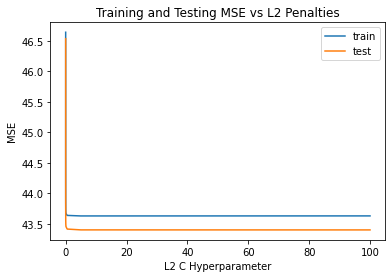

time: 219 ms (started: 2021-12-07 19:47:47 +00:00)


In [ ]:
testing_errors = (np.array(testing_errors)).reshape(-1,1)
training_errors = (np.array(training_errors)).reshape(-1,1)
plt.plot(C_vals, testing_errors)
plt.plot(C_vals, training_errors)
plt.title("Training and Testing MSE vs L2 Penalties")
plt.xlabel("L2 C Hyperparameter")
plt.ylabel("MSE")
plt.legend(["train", "test"])
plt.show()

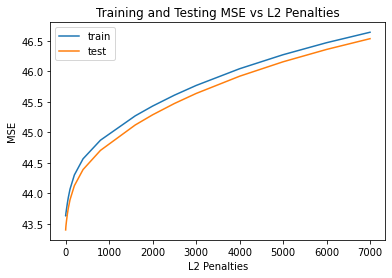

time: 192 ms (started: 2021-12-07 19:47:49 +00:00)


In [ ]:
testing_errors = (np.array(testing_errors)).reshape(-1,1)
training_errors = (np.array(training_errors)).reshape(-1,1)
plt.plot(penalties, testing_errors)
plt.plot(penalties, training_errors)
plt.title("Training and Testing MSE vs L2 Penalties")
plt.xlabel("L2 Penalties")
plt.ylabel("MSE")
plt.legend(["train", "test"])
plt.show()

# Artificial Neural

## Load and scale data

In [ ]:
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/content/drive/My Drive/4ML3/Project/train.csv')
dataset_val = dataset.values

x = dataset_val[:,0:(dataset_val.shape[1])-1]
y = dataset_val[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69420)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train_stand = scaler_x.transform(X_train)
X_test_stand = scaler_x.transform(X_test)
y_train_stand = scaler_y.transform(y_train)
y_test_stand = scaler_y.transform(y_test)

# method to un-normalize the data back to critical temperatures in Kelvin
def inverse_normalize(value, y_or_x):
    new_val = np.array(value).reshape(-1,1)
    
    if y_or_x == "x":
        scaler = scaler_x
    else:
        scaler = scaler_y
    new_val = scaler.inverse_transform(new_val)
    
    return new_val

## Setup Model with Dropout Rate Optimization

### No Validation

In [ ]:
import keras
from keras import Input
from keras import models
from keras import layers
from keras import backend as K
from tensorflow.keras.optimizers import Adam

train_scores = []
vald_scores = []

dropout_rates = [0, 0.05, 0.1, 0.25, 0.5]

# Optimal dropout rate is 0.05
model = models.Sequential() # define that we will use the sequential method to build the ANN
model.add(Input(shape=(X_train_stand.shape[1],))) # Input layer (has cells equal to number of features)
#model.add(layers.Dropout(0.05))
model.add(layers.Dense(160, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
#model.add(layers.Dropout(0.05))
model.add(layers.Dense(1,activation = 'linear',kernel_initializer='glorot_normal', bias_initializer='zeros')) # Output Layer
model.compile(optimizer = Adam(lr=0.001), loss = 'mse', metrics = ['mse'])
model.fit(X_train_stand,y_train_stand, epochs = 500, batch_size = 16,verbose = 1)

# Evaluate model on training and testing data
train_score = model.evaluate(X_train_stand, y_train_stand)
vald_score = model.evaluate(X_test_stand, y_test_stand)

#train_scores.append(train_score[1] * 100)
#vald_scores.append(vald_score[1] * 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


200/200 [==============================] - 1s 3ms/step - loss: 0.1175 - mse: 0.1175


#### Model Evaluation

In [ ]:
train_score = train_score[1]*100
test_score = test_score[1]*100

print("Train Score: {}\nTest Score: {}\n".format(train_score, test_score))

Train Score: [130491.00762068]
Test Score: [4479996.95465996]



In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
model_loss.plot()

TypeError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               13120     
                                                                 
 dense_1 (Dense)             (None, 1)                 161       
                                                                 
Total params: 13,281
Trainable params: 13,281
Non-trainable params: 0
_________________________________________________________________


### Model with Validation

In [ ]:
import keras
from keras import Input
from keras import models
from keras import layers
from keras import backend as K
from tensorflow.keras.optimizers import Adam

train_scores = []
vald_scores = []

dropout_rates = [0, 0.05, 0.1, 0.25, 0.5]

# Optimal dropout rate is 0.05
model = models.Sequential() # define that we will use the sequential method to build the ANN
model.add(Input(shape=(X_train_stand.shape[1],))) # Input layer (has cells equal to number of features)
#model.add(layers.Dropout(0.05))
model.add(layers.Dense(160, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
#model.add(layers.Dropout(0.05))
model.add(layers.Dense(1,activation = 'linear',kernel_initializer='glorot_normal', bias_initializer='zeros')) # Output Layer
model.compile(optimizer = Adam(lr=0.001), loss = 'mse', metrics = ['mse'])
model.fit(X_train_stand,y_train_stand, epochs = 500, batch_size = 16,verbose = 1, validation_data=(X_test_stand, y_test_stand))

# Evaluate model on training and testing data
train_score = model.evaluate(X_train_stand, y_train_stand)
vald_score = model.evaluate(X_test_stand, y_test_stand)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
931/931 [==============================] - 5s 5ms/step - loss: 0.2586 - mse: 0.2586 - val_loss: 0.2130 - val_mse: 0.2130
Epoch 2/500
931/931 [==============================] - 4s 5ms/step - loss: 0.2068 - mse: 0.2068 - val_loss: 0.1972 - val_mse: 0.1972
Epoch 3/500
931/931 [==============================] - 5s 5ms/step - loss: 0.1904 - mse: 0.1904 - val_loss: 0.2006 - val_mse: 0.2006
Epoch 4/500
931/931 [==============================] - 4s 5ms/step - loss: 0.1853 - mse: 0.1853 - val_loss: 0.1862 - val_mse: 0.1862
Epoch 5/500
931/931 [==============================] - 4s 5ms/step - loss: 0.1791 - mse: 0.1791 - val_loss: 0.1847 - val_mse: 0.1847
Epoch 6/500
931/931 [==============================] - 5s 5ms/step - loss: 0.1751 - mse: 0.1751 - val_loss: 0.1815 - val_mse: 0.1815
Epoch 7/500
931/931 [==============================] - 4s 4ms/step - loss: 0.1698 - mse: 0.1698 - val_loss: 0.1830 - val_mse: 0.1830
Epoch 8/500
931/931 [==============================] - 4s 4ms/step - 

### Model with Validation and Dropout (model)

In [ ]:
import keras
from keras import Input
from keras import models
from keras import layers
from keras import backend as K
from tensorflow.keras.optimizers import Adam

train_scores = []
vald_scores = []

# Optimal dropout rate is 0.05
model = models.Sequential() # define that we will use the sequential method to build the ANN
model.add(Input(shape=(X_train_stand.shape[1],))) # Input layer (has cells equal to number of features)
model.add(layers.Dropout(0.05))
model.add(layers.Dense(160, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(1,activation = 'linear',kernel_initializer='glorot_normal', bias_initializer='zeros')) # Output Layer
model.compile(optimizer = Adam(lr=0.001), loss = 'mse', metrics = ['mse'])
fitted_model = model.fit(X_train_stand,y_train_stand, epochs = 500, batch_size = 16,verbose = 1, validation_data=(X_test_stand, y_test_stand))

# Evaluate model on training and testing data
train_score = model.evaluate(X_train_stand, y_train_stand)
vald_score = model.evaluate(X_test_stand, y_test_stand)

931/931 [==============================] - 2s 2ms/step - loss: 0.1785 - mse: 0.1785 - val_loss: 0.1699 - val_mse: 0.1699
Epoch 37/500
931/931 [==============================] - 2s 2ms/step - loss: 0.1795 - mse: 0.1795 - val_loss: 0.1677 - val_mse: 0.1677
Epoch 38/500
931/931 [==============================] - 2s 2ms/step - loss: 0.1780 - mse: 0.1780 - val_loss: 0.1700 - val_mse: 0.1700
Epoch 39/500
931/931 [==============================] - 2s 2ms/step - loss: 0.1748 - mse: 0.1748 - val_loss: 0.1684 - val_mse: 0.1684
Epoch 40/500
931/931 [==============================] - 2s 2ms/step - loss: 0.1764 - mse: 0.1764 - val_loss: 0.1809 - val_mse: 0.1809
Epoch 41/500
931/931 [==============================] - 2s 2ms/step - loss: 0.1766 - mse: 0.1766 - val_loss: 0.1721 - val_mse: 0.1721
Epoch 42/500
931/931 [==============================] - 2s 2ms/step - loss: 0.1763 - mse: 0.1763 - val_loss: 0.1618 - val_mse: 0.1618
Epoch 43/500
347/931 [==========>...................] - ETA: 0s - loss: 0.1

In [ ]:
model

In [ ]:
model_loss = pd.DataFrame(model.history.history.keys())

In [ ]:
model_loss.plot()

TypeError: ignored

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

TypeError: ignored

## ANN Architecture

### Medium Big Brain (mb_model)

In [ ]:
import keras
from keras import Input
from keras import models
from keras import layers
from keras import backend as K
from tensorflow.keras.optimizers import Adam

mb_train_scores = []
mb_vald_scores = []

# Optimal dropout rate is 0.05
mb_model = models.Sequential() # define that we will use the sequential method to build the ANN
mb_model.add(Input(shape=(X_train_stand.shape[1],))) # Input layer (has cells equal to number of features)

# hidden layers
mb_model.add(layers.Dropout(0.05))
mb_model.add(layers.Dense(120, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
mb_model.add(layers.Dropout(0.05))
mb_model.add(layers.Dense(160, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
mb_model.add(layers.Dropout(0.05))
mb_model.add(layers.Dense(120, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
mb_model.add(layers.Dropout(0.05))

# output layer
mb_model.add(layers.Dense(1,activation = 'linear',kernel_initializer='glorot_normal', bias_initializer='zeros')) # Output Layer
mb_model.compile(optimizer = Adam(lr=0.001), loss = 'mse', metrics = ['mse'])
mb_model.fit(X_train_stand,y_train_stand, epochs = 500, batch_size = 16,verbose = 1, validation_data=(X_test_stand, y_test_stand))

# Evaluate model on training and testing data
mb_train_score = model.evaluate(X_train_stand, y_train_stand)
mb_vald_score = model.evaluate(X_test_stand, y_test_stand)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
931/931 [==============================] - 4s 3ms/step - loss: 0.2656 - mse: 0.2656 - val_loss: 0.2317 - val_mse: 0.2317
Epoch 2/500
931/931 [==============================] - 3s 3ms/step - loss: 0.2187 - mse: 0.2187 - val_loss: 0.2002 - val_mse: 0.2002
Epoch 3/500
931/931 [==============================] - 3s 3ms/step - loss: 0.2023 - mse: 0.2023 - val_loss: 0.2092 - val_mse: 0.2092
Epoch 4/500
931/931 [==============================] - 3s 3ms/step - loss: 0.1951 - mse: 0.1951 - val_loss: 0.1869 - val_mse: 0.1869
Epoch 5/500
931/931 [==============================] - 3s 3ms/step - loss: 0.1906 - mse: 0.1906 - val_loss: 0.1949 - val_mse: 0.1949
Epoch 6/500
931/931 [==============================] - 3s 3ms/step - loss: 0.1860 - mse: 0.1860 - val_loss: 0.1955 - val_mse: 0.1955
Epoch 7/500
931/931 [==============================] - 3s 3ms/step - loss: 0.1768 - mse: 0.1768 - val_loss: 0.1659 - val_mse: 0.1659
Epoch 8/500
931/931 [==============================] - 3s 3ms/step - 

NameError: ignored

In [ ]:
mb_model_loss = pd.DataFrame(mb_model.history.history)
mb_model_loss.plot()

### Big Brain (bb_mode)

In [ ]:
import keras
from keras import Input
from keras import models
from keras import layers
from keras import backend as K
from tensorflow.keras.optimizers import Adam

bb_train_scores = []
bb_vald_scores = []

# Optimal dropout rate is 0.05
bb_model = models.Sequential() # define that we will use the sequential method to build the ANN
bb_model.add(Input(shape=(X_train_stand.shape[1],))) # Input layer (has cells equal to number of features)
bb_model.add(layers.Dropout(0.05))
bb_model.add(layers.Dense(100, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
bb_model.add(layers.Dropout(0.05))
bb_model.add(layers.Dense(120, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
bb_model.add(layers.Dropout(0.05))
bb_model.add(layers.Dense(140, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
bb_model.add(layers.Dropout(0.05))
bb_model.add(layers.Dense(160, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
bb_model.add(layers.Dropout(0.05))
bb_model.add(layers.Dense(140, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
bb_model.add(layers.Dropout(0.05))

#output layer
bb_model.add(layers.Dense(1,activation = 'linear',kernel_initializer='glorot_normal', bias_initializer='zeros')) # Output Layer
bb_model.compile(optimizer = Adam(lr=0.001), loss = 'mse', metrics = ['mse'])
bb_model.fit(X_train_stand,y_train_stand, epochs = 500, batch_size = 16,verbose = 1, validation_data=(X_test_stand, y_test_stand))

# Evaluate model on training and testing data
bb_train_score = model.evaluate(X_train_stand, y_train_stand)
bb_vald_score = model.evaluate(X_test_stand, y_test_stand)

In [ ]:
bb_model_loss = pd.DataFrame(bb_model.history.history)
bb_model_loss.plot()

### Autoencode Architecture (ae_simple_model)

In [ ]:
import keras
from keras import Input
from keras import models
from keras import layers
from keras import backend as K
from tensorflow.keras.optimizers import Adam

ae_simple_train_scores = []
ae_simple_vald_scores = []

# Optimal dropout rate is 0.05
ae_simple_model = models.Sequential() # define that we will use the sequential method to build the ANN
ae_simple_model.add(Input(shape=(X_train_stand.shape[1],))) # Input layer (has cells equal to number of features)

# hidden layers
ae_simple_model.add(layers.Dropout(0.05))
ae_simple_model.add(layers.Dense(60, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ae_simple_model.add(layers.Dropout(0.05))
ae_simple_model.add(layers.Dense(30, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ae_simple_model.add(layers.Dropout(0.05))
ae_simple_model.add(layers.Dense(11, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ae_simple_model.add(layers.Dropout(0.05))
ae_simple_model.add(layers.Dense(30, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ae_simple_model.add(layers.Dropout(0.05))
ae_simple_model.add(layers.Dense(60, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ae_simple_model.add(layers.Dropout(0.05))

#output layer
ae_simple_model.add(layers.Dense(1,activation = 'linear',kernel_initializer='glorot_normal', bias_initializer='zeros')) # Output Layer
ae_simple_model.compile(optimizer = Adam(lr=0.001), loss = 'mse', metrics = ['mse'])
ae_simple_model.fit(X_train_stand,y_train_stand, epochs = 500, batch_size = 16,verbose = 1, validation_data=(X_test_stand, y_test_stand))

# Evaluate model on training and testing data
ae_simple_train_score = model.evaluate(X_train_stand, y_train_stand)
ae_simple_vald_score = model.evaluate(X_test_stand, y_test_stand)

In [ ]:
ae_simple_model_loss = pd.DataFrame(ae_simple_model.history.history)
ae_simple_model_loss.plot()

### Omegabrain (ob_model)

In [ ]:
import keras
from keras import Input
from keras import models
from keras import layers
from keras import backend as K
from tensorflow.keras.optimizers import Adam

ob_train_scores = []
ob_vald_scores = []

# Optimal dropout rate is 0.05
ob_model = models.Sequential() # define that we will use the sequential method to build the ANN
ob_model.add(Input(shape=(X_train_stand.shape[1],))) # Input layer (has cells equal to number of features)
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(100, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(120, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(140, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(160, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(180, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(200, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(220, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(240, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(260, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(240, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(220, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(200, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(180, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(160, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(140, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(120, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(100, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))
ob_model.add(layers.Dense(80, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros'))
ob_model.add(layers.Dropout(0.05))


#output layer
ob_model.add(layers.Dense(1,activation = 'linear',kernel_initializer='glorot_normal', bias_initializer='zeros')) # Output Layer
ob_model.compile(optimizer = Adam(lr=0.001), loss = 'mse', metrics = ['mse'])
ob_model.fit(X_train_stand,y_train_stand, epochs = 500, batch_size = 16,verbose = 1, validation_data=(X_test_stand, y_test_stand))

# Evaluate model on training and testing data
ob_train_score = model.evaluate(X_train_stand, y_train_stand)
ob_vald_score = model.evaluate(X_test_stand, y_test_stand)

In [ ]:
ob_model_loss = pd.DataFrame(ob_model.history.history)
ob_model_loss.plot()